# Model Creation

In [2]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import joblib
import os

# Function to extract HOG features from an image
def extract_hog_features(image):
    win_size = (64, 64)
    cell_size = (8, 8)
    block_size = (16, 16)
    nbins = 9

    hog = cv2.HOGDescriptor(win_size, block_size, cell_size, cell_size, nbins)
    features = hog.compute(image)
    features = features.flatten()
    return features

# Function to load and preprocess images
def load_images(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            image_path = os.path.join(directory, filename)

            img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
            if img.shape[-1] == 4:
                img = img[:, :, :3]

            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (64, 64))

            features = extract_hog_features(img)

            images.append(features)
            labels.append(label)

    return images, labels

# Set the paths to your datasets
disease1_dir = r"C:\Users\devin\OneDrive\Desktop\diseases (2)\black gill"
disease2_dir = r"C:\Users\devin\OneDrive\Desktop\diseases (2)\vibrosis"
disease3_dir = r"C:\Users\devin\OneDrive\Desktop\diseases (2)\white spot"
healthy_dir = r"C:\Users\devin\OneDrive\Desktop\diseases (2)\healthy"

# Load and preprocess images for each category
disease1_images, disease1_labels = load_images(disease1_dir, 0)
disease2_images, disease2_labels = load_images(disease2_dir, 1)
disease3_images, disease3_labels = load_images(disease3_dir, 2)
healthy_images, healthy_labels = load_images(healthy_dir, 3)

# Combine data for all categories
X = np.vstack((disease1_images, disease2_images, disease3_images, healthy_images))
y = np.hstack((disease1_labels, disease2_labels, disease3_labels, healthy_labels))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a single Support Vector Machine (SVM) classifier for all categories
svm_classifier_all = SVC(kernel='linear')
svm_classifier_all.fit(X_train, y_train)

# Save the single model to a pickle file
joblib.dump(svm_classifier_all, 'single_model.pkl')


['single_model.pkl']

# Prediction

In [7]:
import cv2
import numpy as np
import joblib

# Function to extract HOG features from an image
def extract_hog_features(image):
    win_size = (64, 64)
    cell_size = (8, 8)
    block_size = (16, 16)
    nbins = 9

    hog = cv2.HOGDescriptor(win_size, block_size, cell_size, cell_size, nbins)
    features = hog.compute(image)
    features = features.flatten()
    return features

# Function to remove simple background (thresholding-based)
def remove_background(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to create a mask for the foreground
    _, mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

    # Apply the mask to the original image
    result = cv2.bitwise_and(image, image, mask=mask)

    return result

# Load the trained model from the pickle file
model = joblib.load('single_model.pkl')

# Function to predict disease name for a given image
def predict_disease(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    
    if img.shape[-1] == 4:
        img = img[:, :, :3]

    # Remove background
    img_no_background = remove_background(img)

    # Convert to grayscale
    img_gray = cv2.cvtColor(img_no_background, cv2.COLOR_BGR2GRAY)

    # Resize the image
    img_resized = cv2.resize(img_gray, (64, 64))

    features = extract_hog_features(img_resized)

    # Reshape the features array to match the input format expected by the model
    features = features.reshape(1, -1)

    # Predict the label for the input image
    prediction = model.predict(features)[0]

    # Map the numerical label to the corresponding disease name
    disease_names = {0: 'BLACK GILL', 1: 'VIBRIOSIS', 2: 'WHITESPOT', 3: 'Healthy'}

    # Get the disease name for the predicted label
    predicted_disease = disease_names[prediction]

    return predicted_disease

# Example usage:
image_path = r"C:\Users\devin\OneDrive\Desktop\diseases (2)\vibrosis\rotated_17.png"
predicted_disease = predict_disease(image_path)
print(f"Predicted Disease: {predicted_disease}")

Predicted Disease: VIBRIOSIS


# Probability

In [6]:
import cv2
import numpy as np
import joblib

# Function to extract HOG features from an image
def extract_hog_features(image):
    win_size = (64, 64)
    cell_size = (8, 8)
    block_size = (16, 16)
    nbins = 9

    hog = cv2.HOGDescriptor(win_size, block_size, cell_size, cell_size, nbins)
    features = hog.compute(image)
    features = features.flatten()
    return features

# Function to remove simple background (thresholding-based)
def remove_background(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to create a mask for the foreground
    _, mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

    # Apply the mask to the original image
    result = cv2.bitwise_and(image, image, mask=mask)

    return result

# Load the trained model from the pickle file
model = joblib.load('single_model.pkl')

# Function to predict disease name for a given image
def predict_disease(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    
    if img.shape[-1] == 4:
        img = img[:, :, :3]

    # Remove background
    img_no_background = remove_background(img)

    # Convert to grayscale
    img_gray = cv2.cvtColor(img_no_background, cv2.COLOR_BGR2GRAY)

    # Resize the image
    img_resized = cv2.resize(img_gray, (64, 64))

    features = extract_hog_features(img_resized)

    # Reshape the features array to match the input format expected by the model
    features = features.reshape(1, -1)

    # Predict the label for the input image
    prediction = model.predict(features)

    # Get the probabilities of different classes
    probabilities = model.decision_function(features)


    # Map the numerical label to the corresponding disease name
    disease_names = {0: 'BLACK GILL', 1: 'VIBRIOSIS', 2: 'WHITESPOT', 3: 'Healthy'}

    # Get the disease name for the predicted label
    predicted_disease = disease_names[prediction[0]]

    return predicted_disease, probabilities[0]

# Example usage:
image_path = r"C:\Users\devin\OneDrive\Desktop\quality images\healthy\pic (46).png"
predicted_disease, predicted_probabilities = predict_disease(image_path)
print(f"Predicted Disease: {predicted_disease}")
print("Predicted Probabilities:")
for i, prob in enumerate(predicted_probabilities):
    disease_name = {0: 'BLACK GILL', 1: 'VIBRIOSIS', 2: 'WHITESPOT', 3: 'Healthy'}[i]
    print(f"{disease_name}: {prob}")


Predicted Disease: Healthy
Predicted Probabilities:
BLACK GILL: -0.2422926456211318
VIBRIOSIS: 2.099056127809592
WHITESPOT: 0.7487665399517797
Healthy: 3.2804119089382957


# Accuracy

Accuracy: 0.93
Precision: 0.94
Recall: 0.93
F1 Score: 0.9358028012855228
Confusion Matrix:
[[  0   1   0   0]
 [  0  47   0   9]
 [  2   0  60   1]
 [  0   3   4 180]]
Classification Report:
              precision    recall  f1-score   support

  Black Gill       0.00      0.00      0.00         1
   Vibriosis       0.92      0.84      0.88        56
  white spot       0.94      0.95      0.94        63
     Healthy       0.95      0.96      0.95       187

    accuracy                           0.93       307
   macro avg       0.70      0.69      0.69       307
weighted avg       0.94      0.93      0.94       307



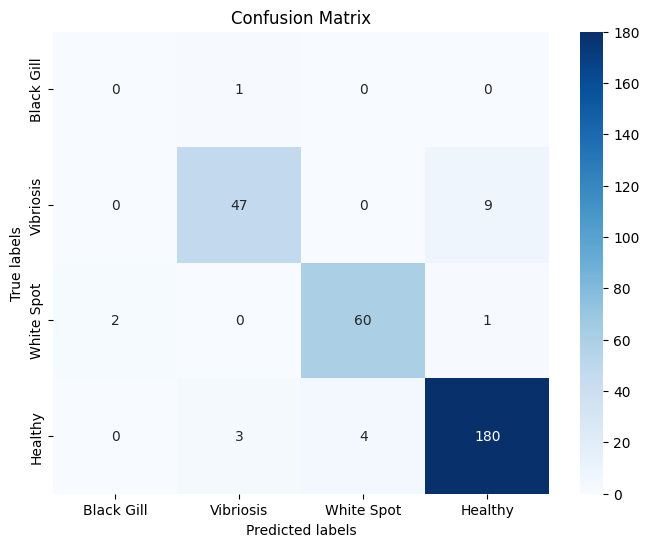

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import numpy as np

# Function to plot accuracy curve during training
def plot_accuracy_curve(history):
    plt.plot(history['train_acc'], label='Training Accuracy')
    plt.plot(history['test_acc'], label='Testing Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Train a single Support Vector Machine (SVM) classifier for all categories
svm_classifier_all = SVC(kernel='linear')

# Save metrics to a dictionary for plotting accuracy curve
history = {'train_acc': [], 'test_acc': []}

# Train the model with multiple epochs and collect accuracy for each epoch
epochs = 10
for epoch in range(epochs):
    svm_classifier_all.fit(X_train, y_train)
    
    # Training accuracy
    train_acc = accuracy_score(y_train, svm_classifier_all.predict(X_train))
    history['train_acc'].append(train_acc)
    
    # Testing accuracy
    test_acc = accuracy_score(y_test, svm_classifier_all.predict(X_test))
    history['test_acc'].append(test_acc)


# Evaluate the model on the test set
y_pred = svm_classifier_all.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision, recall, and confusion matrix
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

print("Confusion Matrix:")
print(conf_matrix)



# Generate and print classification report
class_report = classification_report(y_test, y_pred, target_names=['Black Gill', 'Vibriosis', 'white spot', 'Healthy'])
print("Classification Report:")
print(class_report)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Black Gill', 'Vibriosis', 'White Spot', 'Healthy'], yticklabels=['Black Gill', 'Vibriosis', 'White Spot', 'Healthy'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Different models accuracy comparision table

In [4]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
import os
import pandas as pd

# Function to extract HOG features from an image
def extract_hog_features(image):
    win_size = (64, 64)
    cell_size = (8, 8)
    block_size = (16, 16)
    nbins = 9

    hog = cv2.HOGDescriptor(win_size, block_size, cell_size, cell_size, nbins)
    features = hog.compute(image)
    features = features.flatten()
    return features

# Function to load and preprocess images
def load_images(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            image_path = os.path.join(directory, filename)

            img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
            if img.shape[-1] == 4:
                img = img[:, :, :3]

            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (64, 64))

            features = extract_hog_features(img)

            images.append(features)
            labels.append(label)

    return images, labels

# Set the paths to your datasets
disease1_dir = r"C:\Users\devin\OneDrive\Desktop\diseases (2)\black gill"
disease2_dir = r"C:\Users\devin\OneDrive\Desktop\diseases (2)\vibrosis"
disease3_dir = r"C:\Users\devin\OneDrive\Desktop\diseases (2)\white spot"
healthy_dir = r"C:\Users\devin\OneDrive\Desktop\diseases (2)\healthy"

# Load and preprocess images for each category
disease1_images, disease1_labels = load_images(disease1_dir, 0)
disease2_images, disease2_labels = load_images(disease2_dir, 1)
disease3_images, disease3_labels = load_images(disease3_dir, 2)
healthy_images, healthy_labels = load_images(healthy_dir, 3)

# Combine data for all categories
X = np.vstack((disease1_images, disease2_images, disease3_images, healthy_images))
y = np.hstack((disease1_labels, disease2_labels, disease3_labels, healthy_labels))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing and scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use GridSearchCV to find the best parameters for the linear SVM
param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the linear SVM with the best parameters
svm_classifier_all = SVC(kernel='linear', C=best_params['C'])
svm_classifier_all.fit(X_train_scaled, y_train)

# Save the linear SVM model to a pickle file
joblib.dump(svm_classifier_all, 'linear_svm_model.pkl')

# Evaluate linear SVM model
svm_accuracy = accuracy_score(y_test, svm_classifier_all.predict(X_test_scaled))
svm_precision = precision_score(y_test, svm_classifier_all.predict(X_test_scaled), average='weighted', zero_division=0)
svm_recall = recall_score(y_test, svm_classifier_all.predict(X_test_scaled), average='weighted', zero_division=0)
svm_f1 = f1_score(y_test, svm_classifier_all.predict(X_test_scaled), average='weighted', zero_division=0)

# Cross-validation for SVM with RBF Kernel
svm_rbf_classifier = SVC(kernel='rbf', C=best_params['C'])
svm_rbf_accuracy = np.mean(cross_val_score(svm_rbf_classifier, X_train_scaled, y_train, cv=5))
svm_rbf_classifier.fit(X_train_scaled, y_train)
svm_rbf_precision = precision_score(y_test, svm_rbf_classifier.predict(X_test_scaled), average='weighted', zero_division=0)
svm_rbf_recall = recall_score(y_test, svm_rbf_classifier.predict(X_test_scaled), average='weighted', zero_division=0)
svm_rbf_f1 = f1_score(y_test, svm_rbf_classifier.predict(X_test_scaled), average='weighted', zero_division=0)

# Cross-validation for Random Forest
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_accuracy = np.mean(cross_val_score(random_forest_classifier, X_train_scaled, y_train, cv=5))
random_forest_classifier.fit(X_train_scaled, y_train)
random_forest_precision = precision_score(y_test, random_forest_classifier.predict(X_test_scaled), average='weighted', zero_division=0)
random_forest_recall = recall_score(y_test, random_forest_classifier.predict(X_test_scaled), average='weighted', zero_division=0)
random_forest_f1 = f1_score(y_test, random_forest_classifier.predict(X_test_scaled), average='weighted', zero_division=0)


# Create a comparison table
comparison_table = pd.DataFrame({
    'Model': ['Linear SVM', 'SVM with RBF Kernel (CV)', 'Random Forest (CV)'],
    'Validation Accuracy': [svm_accuracy, svm_rbf_accuracy, random_forest_accuracy],
    'Precision': [svm_precision, svm_rbf_precision, random_forest_precision],
    'Recall': [svm_recall, svm_rbf_recall, random_forest_recall],
    'F1 Score': [svm_f1, svm_rbf_f1, random_forest_f1]
})

# Set the order of columns
comparison_table = comparison_table[['Model', 'Validation Accuracy', 'Precision', 'Recall', 'F1 Score']]

# Print the formatted comparison table
print(comparison_table.to_string(index=False))



                   Model  Validation Accuracy  Precision   Recall  F1 Score
              Linear SVM             0.931596   0.931056 0.931596  0.931170
SVM with RBF Kernel (CV)             0.741224   0.654407 0.794788  0.714957
      Random Forest (CV)             0.902041   0.939133 0.941368  0.939056


# Combination of ROC curves for combination of three models

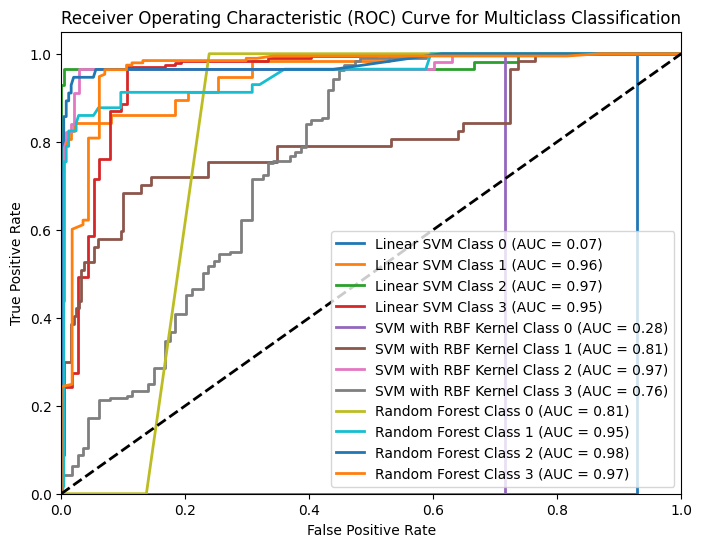

In [24]:
# Plot ROC curves for each class
plt.figure(figsize=(8, 6))

# Plot for Linear SVM
for i in range(len(svm_classifier_all.classes_)):
    fpr, tpr, _ = roc_curve(y_test == svm_classifier_all.classes_[i], svm_classifier_all.decision_function(X_test_scaled)[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='Linear SVM Class %d (AUC = %0.2f)' % (i, auc_score))

# Plot for SVM with RBF Kernel
for i in range(len(svm_rbf_classifier.classes_)):
    fpr, tpr, _ = roc_curve(y_test == svm_rbf_classifier.classes_[i], svm_rbf_classifier.decision_function(X_test_scaled)[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='SVM with RBF Kernel Class %d (AUC = %0.2f)' % (i, auc_score))

# Plot for Random Forest
for i in range(len(random_forest_classifier.classes_)):
    fpr, tpr, _ = roc_curve(y_test == random_forest_classifier.classes_[i], random_forest_classifier.predict_proba(X_test_scaled)[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='Random Forest Class %d (AUC = %0.2f)' % (i, auc_score))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()


# ROC curves for three models seperately

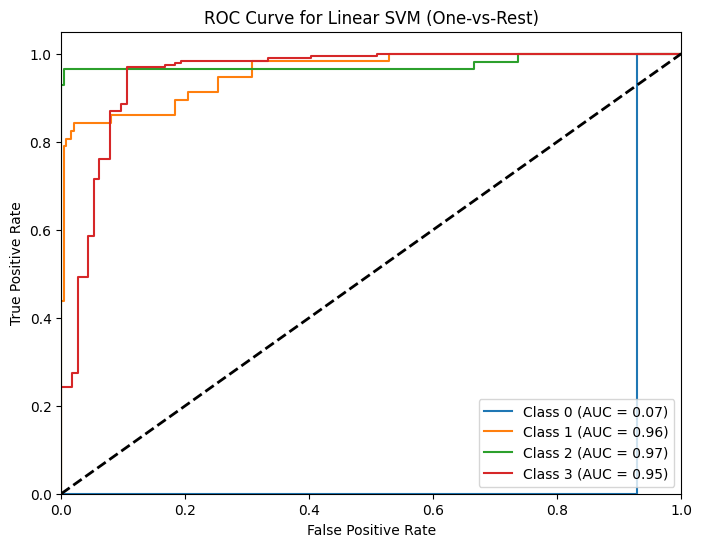

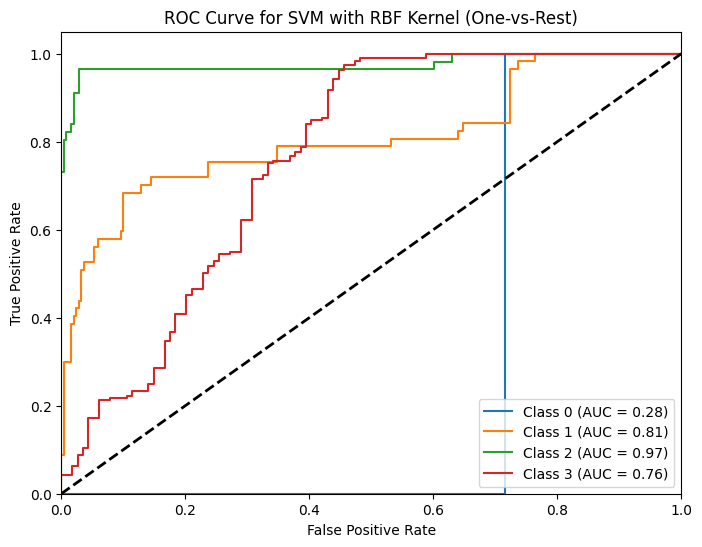

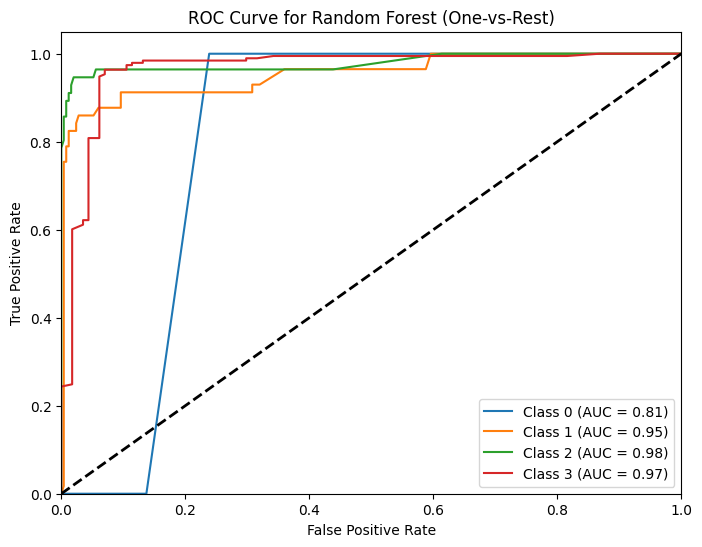

In [26]:
# Plot ROC curve for Linear SVM
plt.figure(figsize=(8, 6))
for i in range(len(svm_classifier_all.classes_)):
    svm_fpr, svm_tpr, _ = roc_curve(y_test == svm_classifier_all.classes_[i], svm_classifier_all.decision_function(X_test_scaled)[:, i])
    svm_auc = auc(svm_fpr, svm_tpr)
    plt.plot(svm_fpr, svm_tpr, label='Class %d (AUC = %0.2f)' % (svm_classifier_all.classes_[i], svm_auc))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Linear SVM (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()


# Plot ROC curve for SVM with RBF Kernel
plt.figure(figsize=(8, 6))
for i in range(len(svm_rbf_classifier.classes_)):
    svm_rbf_fpr, svm_rbf_tpr, _ = roc_curve(y_test == svm_rbf_classifier.classes_[i], svm_rbf_classifier.decision_function(X_test_scaled)[:, i])
    svm_rbf_auc = auc(svm_rbf_fpr, svm_rbf_tpr)
    plt.plot(svm_rbf_fpr, svm_rbf_tpr, label='Class %d (AUC = %0.2f)' % (svm_rbf_classifier.classes_[i], svm_rbf_auc))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM with RBF Kernel (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
for i in range(len(random_forest_classifier.classes_)):
    random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test == random_forest_classifier.classes_[i], random_forest_classifier.predict_proba(X_test_scaled)[:, i])
    random_forest_auc = auc(random_forest_fpr, random_forest_tpr)
    plt.plot(random_forest_fpr, random_forest_tpr, label='Class %d (AUC = %0.2f)' % (random_forest_classifier.classes_[i], random_forest_auc))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()


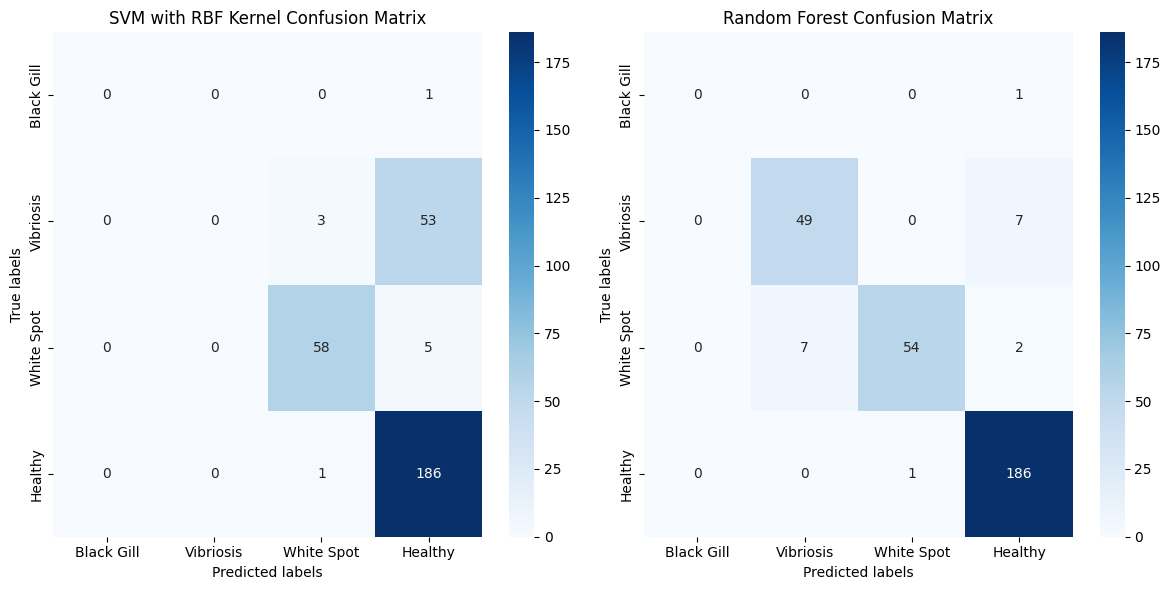

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import cv2
import os

# Function to extract HOG features from an image
def extract_hog_features(image):
    win_size = (64, 64)
    cell_size = (8, 8)
    block_size = (16, 16)
    nbins = 9

    hog = cv2.HOGDescriptor(win_size, block_size, cell_size, cell_size, nbins)
    features = hog.compute(image)
    features = features.flatten()
    return features

# Function to load and preprocess images
def load_images(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            image_path = os.path.join(directory, filename)

            img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
            if img.shape[-1] == 4:
                img = img[:, :, :3]

            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (64, 64))

            features = extract_hog_features(img)

            images.append(features)
            labels.append(label)

    return images, labels

# Set the paths to your datasets
disease1_dir = r"C:\Users\devin\OneDrive\Desktop\diseases (2)\black gill"
disease2_dir = r"C:\Users\devin\OneDrive\Desktop\diseases (2)\vibrosis"
disease3_dir = r"C:\Users\devin\OneDrive\Desktop\diseases (2)\white spot"
healthy_dir = r"C:\Users\devin\OneDrive\Desktop\diseases (2)\healthy"

# Load and preprocess images for each category
disease1_images, disease1_labels = load_images(disease1_dir, 0)
disease2_images, disease2_labels = load_images(disease2_dir, 1)
disease3_images, disease3_labels = load_images(disease3_dir, 2)
healthy_images, healthy_labels = load_images(healthy_dir, 3)

# Combine data for all categories
X = np.vstack((disease1_images, disease2_images, disease3_images, healthy_images))
y = np.hstack((disease1_labels, disease2_labels, disease3_labels, healthy_labels))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing and scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with RBF kernel
svm_rbf_classifier = SVC(kernel='rbf', C=best_params['C'])
svm_rbf_classifier.fit(X_train_scaled, y_train)

# Train Random Forest
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train_scaled, y_train)

# Generate confusion matrices
svm_rbf_conf_matrix = confusion_matrix(y_test, svm_rbf_classifier.predict(X_test_scaled))
random_forest_conf_matrix = confusion_matrix(y_test, random_forest_classifier.predict(X_test_scaled))

# Plot confusion matrices as heatmaps
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(svm_rbf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Black Gill', 'Vibriosis', 'White Spot', 'Healthy'], yticklabels=['Black Gill', 'Vibriosis', 'White Spot', 'Healthy'])
plt.title('SVM with RBF Kernel Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.subplot(1, 2, 2)
sns.heatmap(random_forest_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Black Gill', 'Vibriosis', 'White Spot', 'Healthy'], yticklabels=['Black Gill', 'Vibriosis', 'White Spot', 'Healthy'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.tight_layout()
plt.show()
